# Step 1: Read Data
In this step, I dropped the unused column 'zipcode', and set the 'PersonID' as index.

In [1]:
import HW2

In [2]:
df = HW2.read_data('~/Downloads/HW2/data/credit-data.csv')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
PersonID,,,,,,,,,,,
98976,0,1.000000,55,0,505.000000,0.0,2,0,0,0,0.0
98991,0,0.547745,71,0,0.459565,15666.0,7,0,2,0,0.0
99012,0,0.044280,51,0,0.014520,4200.0,5,0,0,0,0.0
99023,0,0.914249,55,4,0.794875,9052.0,12,0,3,0,0.0
99027,0,0.026599,45,0,0.049966,10406.0,4,0,0,0,2.0


# Step 2: Explore Data
The exploration of data is divided into four parts:
- summary of continuous variables
- summary of categorical variables
- histographs of variables
- graph of correlation between variables

In [3]:
HW2.summary_continuous_vars(df)

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.00000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,6.37587,51.683489,331.458137,0.589233,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,221.61895,14.746880,1296.109695,5.205628,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,0.00000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.03431,41.000000,0.176375,0.000000,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.18973,51.000000,0.369736,0.000000,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.66716,62.000000,0.866471,0.000000,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,22000.00000,109.000000,106885.000000,98.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


The table above shows the decriptive statistics of the continuous variables including the amount, mean, stand deviation and so on.

In [4]:
HW2.summary_categorical_vars(df)

,count,SeriousDlqin2yrs
0,0,34396
1,1,6620


From the table above, we can find that there are 6620 serious due delinquency (19.25%), which is roughly a fifth.

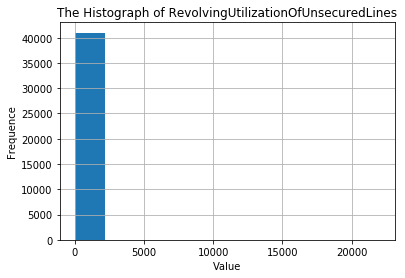

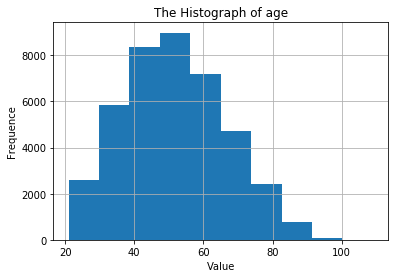

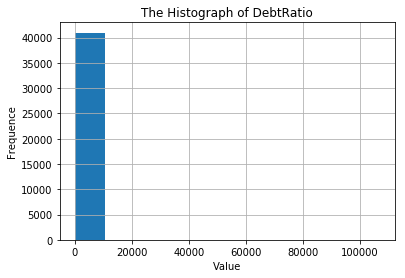

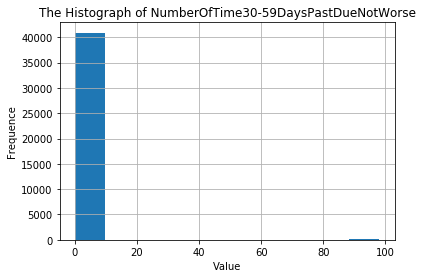

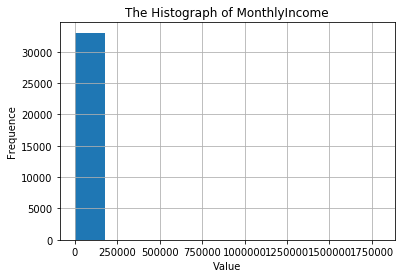

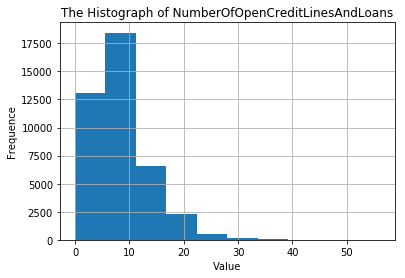

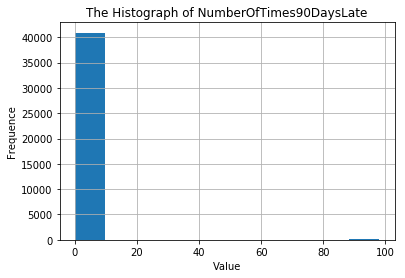

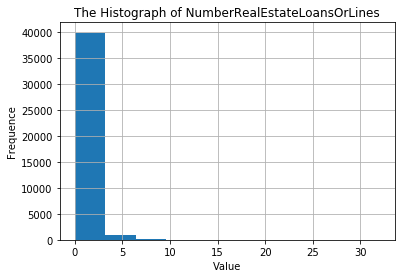

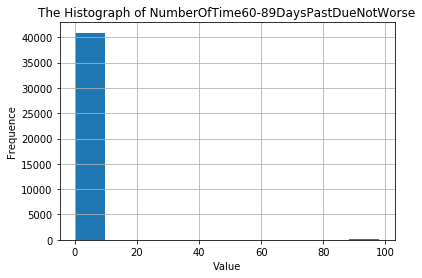

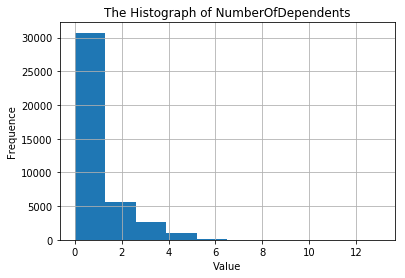

In [5]:
HW2.generate_graph(df)

From the histographs above, we can find that the distributions of most varibables are long-tailed, that is, most values of these variables are concentrated on the left side.

In [6]:
HW2.generate_corr_graph(df)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1,-0.004586,-0.1737,0.1493,-0.0135,-0.03281,-0.0399,0.1396,-0.01064,0.1219,0.06571
RevolvingUtilizationOfUnsecuredLines,-0.004586,1,-0.008003,-0.001999,0.02225,0.005832,-0.01459,-0.001686,0.004763,-0.001413,0.005342
age,-0.1737,-0.008003,1,-0.0687,0.03883,0.04814,0.1599,-0.06904,0.04917,-0.06362,-0.211
NumberOfTime30-59DaysPastDueNotWorse,0.1493,-0.001999,-0.0687,1,-0.01162,-0.01522,-0.0707,0.9845,-0.03786,0.9885,-0.00784
DebtRatio,-0.0135,0.02225,0.03883,-0.01162,1,-0.02299,0.08279,-0.01479,0.1779,-0.01329,-0.07056
MonthlyIncome,-0.03281,0.005832,0.04814,-0.01522,-0.02299,1,0.1071,-0.01795,0.1273,-0.01534,0.06053
NumberOfOpenCreditLinesAndLoans,-0.0399,-0.01459,0.1599,-0.0707,0.08279,0.1071,1,-0.09818,0.4428,-0.08715,0.06022
NumberOfTimes90DaysLate,0.1396,-0.001686,-0.06904,0.9845,-0.01479,-0.01795,-0.09818,1,-0.05466,0.9921,-0.01574
NumberRealEstateLoansOrLines,-0.01064,0.004763,0.04917,-0.03786,0.1779,0.1273,0.4428,-0.05466,1,-0.048,0.1149
NumberOfTime60-89DaysPastDueNotWorse,0.1219,-0.001413,-0.06362,0.9885,-0.01329,-0.01534,-0.08715,0.9921,-0.048,1,-0.01649


From the table illustrating the relationships between variables of interest, we can find that there are several sets of variables that are high correlated (dark blue area).
- number of times 30-59 days past due & number of times 90 days late
- number of times 30-59 days past due & number of times 60-89 days past due
- number of times 60-89 days past due & number of times 90 days late

That is, people who past due 30-59 days are more likely to past due 60-89 days and 90 days late.

In [7]:
outliers = HW2.count_outliers(df)
outliers

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,61,20,601,114,93,413,115,469,114,274


In [8]:
outliers.sum().mean()

227.4

From the table above, we can find that the varibale 'DebtRatio' has the most outliers and the varible 'age' has the fewest outliers. The average outliers of all variables is 227.

# Step 3: Pre-Process Data
In this step, I replaced the missing values with median.

In [9]:
# Before replacement
df.isnull().sum()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           7974
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1037
dtype: int64

In [10]:
# After replacement
HW2.fill_missing_with_median(df, 'MonthlyIncome')
HW2.fill_missing_with_median(df, 'NumberOfDependents')
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

# Step 4: Generate Features
In this step, I choosed the continuous variables 'age' and 'MonthlyIncome' to be converted to categorical variables. Meanwhile, I created dummy variables for both.

In [11]:
# discretize 'MonthlyIncome'
labels_income = ['low', 'mediate', 'high']
min_income = df['MonthlyIncome'].min()
max_income = df['MonthlyIncome'].max()
q1 = df['MonthlyIncome'].quantile(0.25)
q3 = df['MonthlyIncome'].quantile(0.75)
bins_income = [min_income, q1, q3, max_income]
df = HW2.discretize_continuous_var(df, 'MonthlyIncome', bins_income, labels_income)

In [12]:
# discretize 'age'
labels_age = ['20-35', '35-50', '50-65', '65-80','80-95','95-110']
bins_age = range(20,111,15)
df = HW2.discretize_continuous_var(df, 'age', bins_age, labels_age)

In [13]:
df = HW2.create_binary_var(df, ['discretized_age', 'discretized_MonthlyIncome'])
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,discretized_age_20-35,discretized_age_35-50,discretized_age_50-65,discretized_age_65-80,discretized_age_80-95,discretized_age_95-110,discretized_MonthlyIncome_low,discretized_MonthlyIncome_mediate,discretized_MonthlyIncome_high
PersonID,,,,,,,,,,,,,,,,,,,,
98976,0,1.000000,55,0,505.000000,0.0,2,0,0,0,0.0,0,0,1,0,0,0,0,0,0
98991,0,0.547745,71,0,0.459565,15666.0,7,0,2,0,0.0,0,0,0,1,0,0,0,0,1
99012,0,0.044280,51,0,0.014520,4200.0,5,0,0,0,0.0,0,0,1,0,0,0,0,1,0
99023,0,0.914249,55,4,0.794875,9052.0,12,0,3,0,0.0,0,0,1,0,0,0,0,0,1
99027,0,0.026599,45,0,0.049966,10406.0,4,0,0,0,2.0,0,1,0,0,0,0,0,0,1


# Step 5: Build Classifier
In this step, I choosed three models (Logistic Regression, K-Nearest Neighbors, Decision Tree) to build the classiers with the method from ```sklearn```.

In [14]:
predictors = df.columns.difference([HW2.TARGET])
train_data, test_data, train_target, test_target = HW2.split_data(df, predictors)
for classifier in HW2.CLASSIFIERS:
    HW2.build_classifier(classifier, train_data, train_target)

# Step 6: Evaluate Classifier
In this step, I evaluated the classifiers based on two dimensions (accuracy and precision). After comparison, the accuracy score and precision score of Logistic Regression are the highest, that is, Logistic Regressio classifier is the best classifier to predict who will experience financial distress in the next two years.

In [15]:
HW2.evaluate_classifier(df)

The accuracy score of Logistic Regression is 0.8427596294490493
The precision score of Logistic Regression is 0.711864406779661
The accuracy score of K-Nearest Neighbors is 0.825450999512433
The precision score of K-Nearest Neighbors is 0.3380281690140845
The accuracy score of Decision Tree is 0.8139931740614335
The precision score of Decision Tree is 0.4330935251798561
